In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import os
os.chdir('/content/drive/MyDrive/Colab_Notebooks/Capstone')

In [78]:
import pandas as pd

In [79]:
df_train = pd.read_csv('data/imdb_train.csv')
df_test = pd.read_csv('data/imdb_test.csv')

In [80]:
df = pd.concat([df_train, df_test], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [81]:
df.head()

,text,label
0,King of Masks (Bian Lian in China) is a shocki...,1
1,You may be interested to know that BARRICADE w...,0
2,Pinjar by Mr dwivedi is an awesome movie. Its ...,1
3,Talk about being boring!<br /><br />I got this...,0
4,I've found the movie offensive for Americans w...,0


In [82]:
df.shape

(50000, 2)

In [83]:
import re
from bs4 import BeautifulSoup
# 移除HTML标签
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# 移除特殊字符和数字
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

# 转换为小写
def to_lower(text):
    return text.lower()

def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_special_characters(text)
    text = to_lower(text)
    return text

df['text'] = df['text'].apply(preprocess_text)

<ipython-input-83-7a3dcfc9ea3f>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


In [85]:
os.chdir('/content/drive/MyDrive/Colab_Notebooks')

In [86]:
# import Word2Vec loading capabilities
from gensim.models import KeyedVectors

# Creating the model
embed_lookup = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300-SLIM.bin',
                                                 binary=True)


In [87]:
# store pretrained vocab
pretrained_words = []
for word in embed_lookup.index_to_key:
    pretrained_words.append(word)

In [88]:
row_idx = 1

# get word/embedding in that row
word = pretrained_words[row_idx] # get words by index
embedding = embed_lookup[word] # embeddings by word

# vocab and embedding info
print("Size of Vocab: {}\n".format(len(pretrained_words)))
print('Word in vocab: {}\n'.format(word))
print('Length of embedding: {}\n'.format(len(embedding)))
#print('Associated embedding: \n', embedding)

Size of Vocab: 299567

Word in vocab: for

Length of embedding: 300



In [89]:
# Pick a word
find_similar_to = 'fabulous'

print('Similar words to '+find_similar_to+': \n')

# Find similar words, using cosine similarity
# by default shows top 10 similar words
for similar_word in embed_lookup.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.3f}".format(
        similar_word[0], similar_word[1]
    ))

Similar words to fabulous: 

Word: wonderful, Similarity: 0.761
Word: fantastic, Similarity: 0.761
Word: marvelous, Similarity: 0.730
Word: gorgeous, Similarity: 0.714
Word: lovely, Similarity: 0.713
Word: terrific, Similarity: 0.694
Word: amazing, Similarity: 0.693
Word: beautiful, Similarity: 0.670
Word: magnificent, Similarity: 0.667
Word: splendid, Similarity: 0.645


In [90]:
def tokenize_reviews(embed_lookup, reviews):
    tokenized_reviews = []
    for review in reviews:
        ints = []
        words = review.split()  # 分割评论为单词列表
        for word in words:
            # 尝试获取单词的索引，如果单词不存在，则索引为0（通常用于表示未知单词）
            idx = embed_lookup.key_to_index.get(word, 0)
            ints.append(idx)
        tokenized_reviews.append(ints)

    return tokenized_reviews

In [91]:
tokenized_reviews = tokenize_reviews(embed_lookup, df['text'])
# testing code and printing a tokenized review
print(tokenized_reviews[0])

[5952, 0, 13100, 0, 181241, 0, 28644, 3, 0, 29853, 2737, 0, 18144, 8099, 661, 1095, 0, 2267, 15, 175, 9, 147, 25, 661, 179, 4, 0, 1185, 521, 1996, 4, 126729, 0, 0, 1434, 8037, 0, 1239, 28644, 28, 3, 846, 1686, 30, 22, 81, 19018, 0, 869, 4, 23, 1405, 0, 0, 9620, 20, 22, 0, 1484, 2147, 0, 933, 2131, 13100, 0, 448, 0, 81, 40, 1451, 132, 20, 171, 13, 20, 22, 0, 23946, 3257, 0, 19, 0, 9276, 12, 23, 1405, 3, 0, 229, 44585, 2, 45, 84, 14, 1088, 4, 0, 0, 2785, 19018, 34, 138, 143, 0, 9, 1798, 0, 148, 2, 63, 17, 1180, 27, 254, 91, 29, 24354, 2688, 0, 135, 612, 0, 77, 73, 17, 146, 14446, 0, 135, 27, 4928, 1, 287, 91, 4928, 17, 11, 1032, 141, 0, 25, 1923, 126729, 0, 521, 1011, 4, 15, 0, 661, 8, 80, 37732, 120, 9, 2456, 8, 2756, 0, 9, 514, 33, 80, 32962, 0, 0, 67, 3, 9, 6520, 19020, 0, 9, 15918, 562, 2, 0, 25, 54, 0, 207, 81, 40, 726, 0, 270, 1364, 48, 2080, 0, 1682, 3, 2, 9, 9533, 9620, 2595, 28, 364, 1160, 0, 610, 0, 3, 488, 12, 9, 930, 179095, 3, 0, 236, 28, 11080, 12, 0, 610, 0, 112, 20, 3, 24

In [92]:
def pad_features(tokenized_reviews, seq_length):
    ''' Return features of tokenized_reviews, where each review is padded with 0's
        or truncated to the input seq_length.
    '''

    # getting the correct rows x cols shape
    features = np.zeros((len(tokenized_reviews), seq_length), dtype=int)

    # for each review, I grab that review and
    for i, row in enumerate(tokenized_reviews):
        features[i, -len(row):] = np.array(row)[:seq_length]

    return features

In [93]:
import numpy as np

In [94]:
seq_length = 200

features = pad_features(tokenized_reviews, seq_length=seq_length)

## test statements - do not change - ##
assert len(features)==len(tokenized_reviews), "Features should have as many rows as reviews."
assert len(features[0])==seq_length, "Each feature row should contain seq_length values."

# print first 8 values of the first 20 batches
print(features[:20,:8])

[[  5952      0  13100      0 181241      0  28644      3]
 [    38    130     14   1528      0    165      2  30003]
 [     0     16  64499      0      3     24   5907   1083]
 [     0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0]
 [     0      0      0      0   3225 110996 161899  40613]
 [214547      3   3617  81823      0     39    275    216]
 [     0      0      0      0      0      0      0      0]
 [  4365    770     39   2543      0  31078   8171     12]
 [     0      0      0      0      0      0      0      0]
 [     2  10497   1282      0    243      2    267    160]
 [     0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0]
 [     0     14  75523   4365    219      0     82     25]
 [    82      0      0      9   2209   1245   1364     2

In [95]:
split_frac = 0.6

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y = df['label'][:split_idx]
remaining_y = df['label'][split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape),
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))


			Feature Shapes:
Train set: 		(30000, 200) 
Validation set: 	(10000, 200) 
Test set: 		(10000, 200)


In [96]:
#check the balance of dataset
test_y.value_counts()

label
1    5005
0    4995
Name: count, dtype: int64

In [97]:
train_y = train_y.to_numpy()
val_y = val_y.to_numpy()
test_y = test_y.to_numpy()

In [98]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 48

# shuffling and batching data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [99]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [100]:
import torch.nn as nn
import torch.nn.functional as F

class SentimentCNN(nn.Module):
    """
    The embedding layer + CNN model that will be used to perform sentiment analysis.
    """

    def __init__(self, embed_model, vocab_size, output_size, embedding_dim,
                 num_filters=100, kernel_sizes=[3, 4, 5], freeze_embeddings=True, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentCNN, self).__init__()

        # set class vars
        self.num_filters = num_filters
        self.embedding_dim = embedding_dim

        # 1. embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        # set weights to pre-trained
        self.embedding.weight = nn.Parameter(torch.from_numpy(embed_model.vectors)) # all vectors
        # (optional) freeze embedding weights
        if freeze_embeddings:
            self.embedding.requires_grad = False

        # 2. convolutional layers
        self.convs_1d = nn.ModuleList([
            nn.Conv2d(1, num_filters, (k, embedding_dim), padding=(k-2,0))
            for k in kernel_sizes])

        # 3. final, fully-connected layer for classification
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, output_size)

        # 4. dropout and sigmoid layers
        self.dropout = nn.Dropout(drop_prob)
        self.sig = nn.Sigmoid()


    def conv_and_pool(self, x, conv):
        """
        Convolutional + max pooling layer
        """
        # squeeze last dim to get size: (batch_size, num_filters, conv_seq_length)
        # conv_seq_length will be ~ 200
        x = F.relu(conv(x)).squeeze(3)

        # 1D pool over conv_seq_length
        # squeeze to get size: (batch_size, num_filters)
        x_max = F.max_pool1d(x, x.size(2)).squeeze(2)
        return x_max

    def forward(self, x):
        """
        Defines how a batch of inputs, x, passes through the model layers.
        Returns a single, sigmoid-activated class score as output.
        """
        # embedded vectors
        embeds = self.embedding(x) # (batch_size, seq_length, embedding_dim)
        # embeds.unsqueeze(1) creates a channel dimension that conv layers expect
        embeds = embeds.unsqueeze(1)

        # get output of each conv-pool layer
        conv_results = [self.conv_and_pool(embeds, conv) for conv in self.convs_1d]

        # concatenate results and add dropout
        x = torch.cat(conv_results, 1)
        x = self.dropout(x)

        # final logit
        logit = self.fc(x)

        # sigmoid-activated --> a class score
        return self.sig(logit)


In [156]:
# Instantiate the model w/ hyperparams

vocab_size = len(pretrained_words)
output_size = 1 # binary class (1 or 0)
embedding_dim = len(embed_lookup[pretrained_words[0]]) # 300-dim vectors
num_filters = 110
kernel_sizes = [3, 4, 5]

net = SentimentCNN(embed_lookup, vocab_size, output_size, embedding_dim,
                   num_filters, kernel_sizes)

print(net)

SentimentCNN(
  (embedding): Embedding(299567, 300)
  (convs_1d): ModuleList(
    (0): Conv2d(1, 110, kernel_size=(3, 300), stride=(1, 1), padding=(1, 0))
    (1): Conv2d(1, 110, kernel_size=(4, 300), stride=(1, 1), padding=(2, 0))
    (2): Conv2d(1, 110, kernel_size=(5, 300), stride=(1, 1), padding=(3, 0))
  )
  (fc): Linear(in_features=330, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (sig): Sigmoid()
)


In [157]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


In [158]:
import matplotlib.pyplot as plt

In [159]:
# training loop
def train(net, train_loader, epochs, print_every=100):

    train_losses = []  # 用于记录每100次迭代的平均训练损失
    valid_losses = []  # 用于记录每100次迭代的平均验证损失

    # move model to GPU, if available
    if(train_on_gpu):
        net.cuda()

    counter = 0 # for printing

    # train for some number of epochs
    net.train()
    for e in range(epochs):

        # batch loop
        for inputs, labels in train_loader:
            counter += 1

            if(train_on_gpu):
                inputs, labels = inputs.cuda(), labels.cuda()

            # zero accumulated gradients
            net.zero_grad()

            # get the output from the model
            output = net(inputs)

            # calculate the loss and perform backprop
            loss = criterion(output.squeeze(), labels.float())
            loss.backward()
            optimizer.step()

            # loss stats
            if counter % print_every == 0:
                # Get validation loss
                val_losses = []
                net.eval()
                for inputs, labels in valid_loader:

                    if(train_on_gpu):
                        inputs, labels = inputs.cuda(), labels.cuda()

                    output = net(inputs)
                    val_loss = criterion(output.squeeze(), labels.float())

                    val_losses.append(val_loss.item())

                net.train()

                # 记录当前的训练和验证损失
                train_losses.append(loss.item())
                valid_losses.append(np.mean(val_losses))

                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.6f}...".format(loss.item()),
                      "Val Loss: {:.6f}".format(np.mean(val_losses)))

    # 绘制训练和验证损失曲线
    plt.figure(figsize=(10, 6))
    plt.plot(range(print_every, print_every * len(train_losses) + 1, print_every), train_losses, label='Training Loss')
    plt.plot(range(print_every, print_every * len(valid_losses) + 1, print_every), valid_losses, label='Validation Loss')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.ylim(0, 1)  # 设置Y轴的范围为0到1
    plt.show()

Epoch: 1/2... Step: 100... Loss: 0.391345... Val Loss: 0.450309
Epoch: 1/2... Step: 200... Loss: 0.376263... Val Loss: 0.366323
Epoch: 1/2... Step: 300... Loss: 0.355699... Val Loss: 0.333640
Epoch: 1/2... Step: 400... Loss: 0.534499... Val Loss: 0.330191
Epoch: 1/2... Step: 500... Loss: 0.438784... Val Loss: 0.318656
Epoch: 1/2... Step: 600... Loss: 0.367332... Val Loss: 0.304410
Epoch: 2/2... Step: 700... Loss: 0.300946... Val Loss: 0.308227
Epoch: 2/2... Step: 800... Loss: 0.338897... Val Loss: 0.307501
Epoch: 2/2... Step: 900... Loss: 0.188395... Val Loss: 0.309738
Epoch: 2/2... Step: 1000... Loss: 0.203014... Val Loss: 0.317945
Epoch: 2/2... Step: 1100... Loss: 0.210152... Val Loss: 0.328566
Epoch: 2/2... Step: 1200... Loss: 0.095763... Val Loss: 0.316847


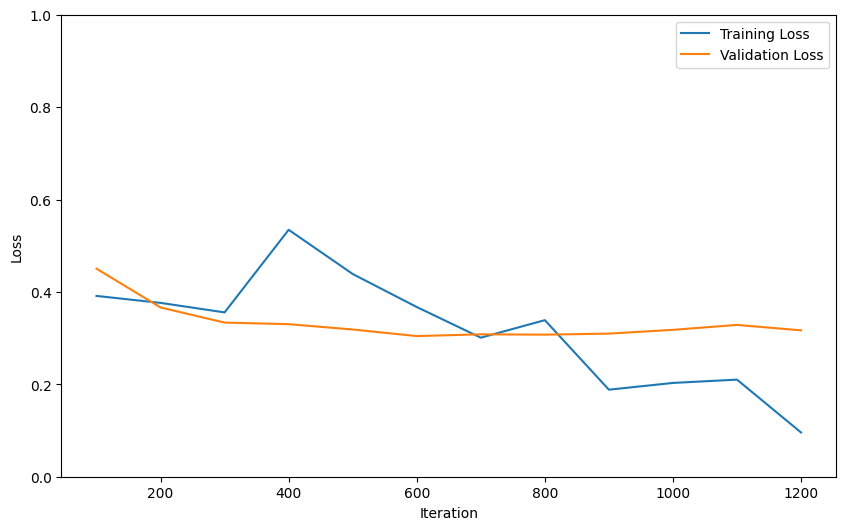

In [160]:
# training params

epochs = 2 # this is approx where I noticed the validation loss stop decreasing
print_every = 100

train(net, train_loader, epochs, print_every=print_every)

In [161]:
from sklearn.metrics import confusion_matrix

In [162]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

##new
all_preds = []
all_labels = []

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # get predicted outputs
    output = net(inputs)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    ##new
    all_preds.extend(pred.detach().cpu().numpy())
    all_labels.extend(labels.detach().cpu().numpy())

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.307
Test accuracy: 0.873


In [163]:
from sklearn.metrics import confusion_matrix, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
cm = confusion_matrix(all_labels, all_preds)

In [165]:
TN, FP, FN, TP = cm.ravel()
precision_positive = TP / (TP + FP) if (TP + FP) > 0 else 0
precision_negative = TN / (TN + FN) if (TN + FN) > 0 else 0

In [166]:
precision_positive

0.8800081350416921

In [167]:
precision_negative

0.8666142042101121